# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Multi-Task Joint Model

In [11]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [13]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [14]:
# has combined targets
joint_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,stdev_positivity_zscore_conversation,min_positivity_zscore_conversation,max_positivity_zscore_conversation,average_dale_chall_score,stdev_dale_chall_score,min_dale_chall_score,max_dale_chall_score,dataset_name,target_raw,target_std
0,0.159463,0.166055,107.000000,33.948490,30,140,536.625000,168.104088,183,725,...,2.831619,-4.898307,4.960851,6.083922,2.557801,1.4880,10.922575,juries,0.975118,0.975118
1,0.125695,0.124663,109.833333,28.457083,76,169,576.666667,151.855926,433,903,...,5.043471,-5.778393,8.964610,16.000926,8.558771,5.0096,28.539211,juries,-1.368196,-1.368196
2,0.224885,0.220860,66.428571,27.338393,18,114,346.142857,141.756762,124,619,...,3.143499,-4.958624,6.045029,9.879860,10.575539,2.4800,34.399568,juries,-0.977644,-0.977644
3,0.261432,0.248455,86.600000,42.898019,25,159,446.600000,211.715469,122,789,...,2.057525,-3.719194,2.166124,10.722113,6.650405,1.2400,17.866257,juries,-0.489453,-0.489453
4,0.113767,0.106352,132.200000,28.237564,103,183,677.000000,140.125658,543,934,...,3.017882,-5.376156,3.332328,10.947204,3.328284,6.1008,16.404568,juries,0.975118,0.975118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.000000,0.000000,0.000000,0.049600,0.000000,0.0496,0.049600,dat,76.599130,-0.956826
191,0.333333,0.371585,14.666667,9.568467,6,28,61.000000,44.452222,21,123,...,1.097626,-1.540194,0.937509,0.727467,0.474596,0.2976,1.388800,dat,82.905364,0.130803
192,0.183908,0.189744,9.666667,3.299832,6,14,43.333333,15.326085,23,60,...,0.294547,-0.413803,0.248282,3.007467,3.555442,0.2976,8.030400,dat,83.106215,0.165444
193,0.180556,0.177709,18.000000,5.958188,11,30,85.375000,27.417775,51,131,...,1.559643,-3.050817,1.602972,0.892800,0.295526,0.5456,1.488000,dat,90.162293,1.382398


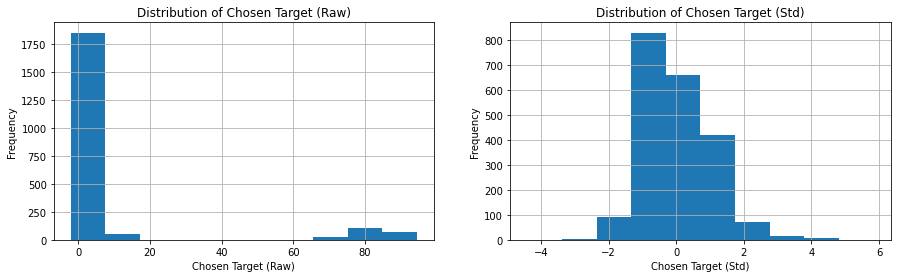

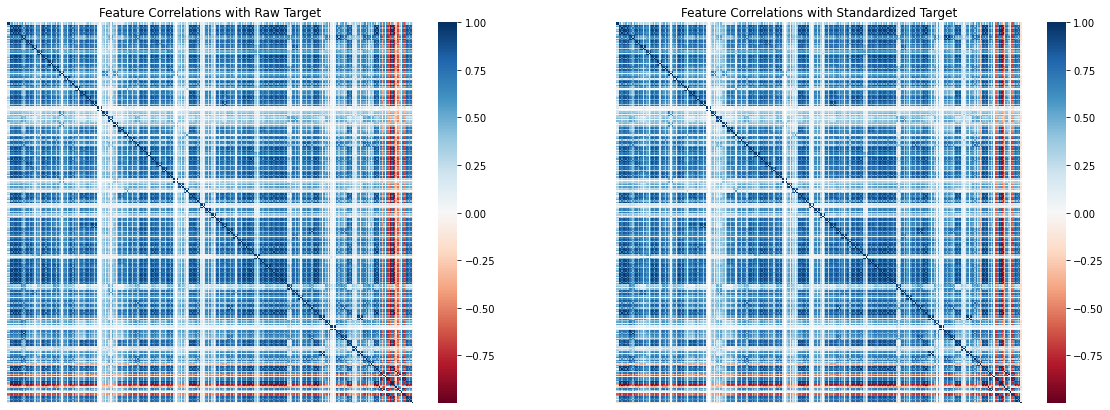

In [15]:
joint_model.viz_target()

In [19]:
joint_model.define_model(model_type = 'xgb')

In [20]:
joint_model.model_metrics(joint_model.baseline_model)

Model Metrics
R2: 0.0224	MAE: 0.7746	MSE: 1.0141	RMSE: 1.007


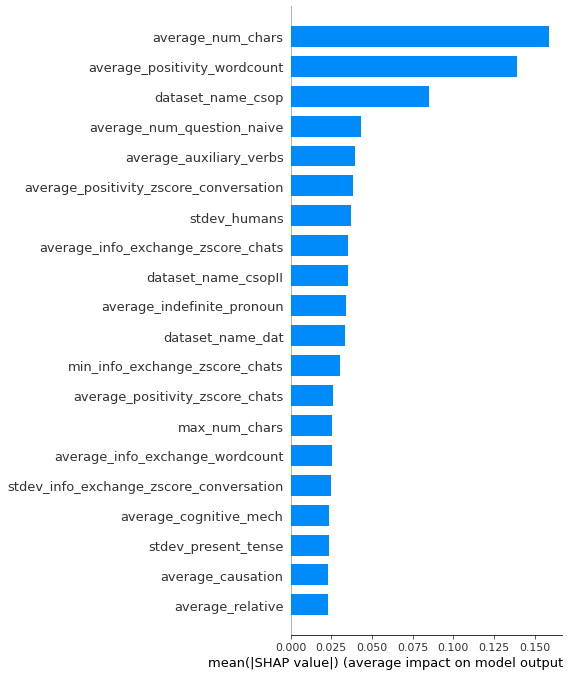

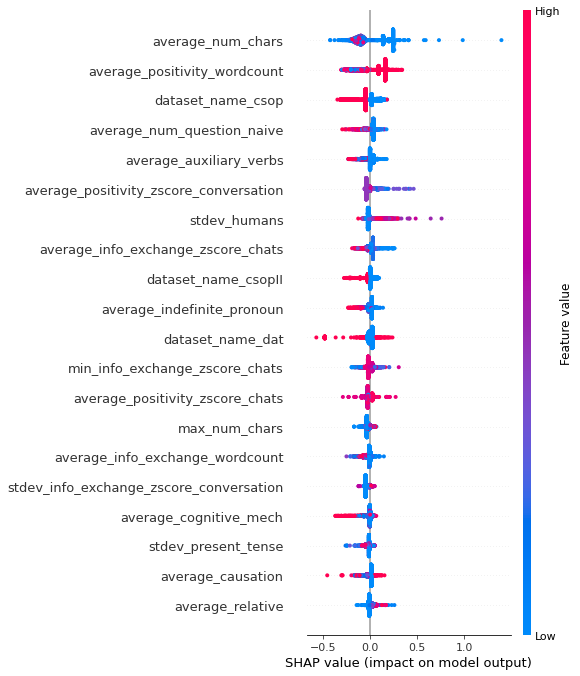

In [21]:
joint_model.model_diagnostics(joint_model.baseline_model)

# Juries Model

In [4]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [4]:
juries_model.select_target(target=juries_model.conv_complete["majority_pct"])

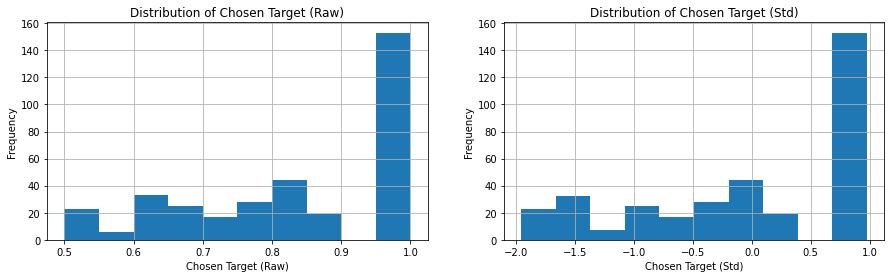

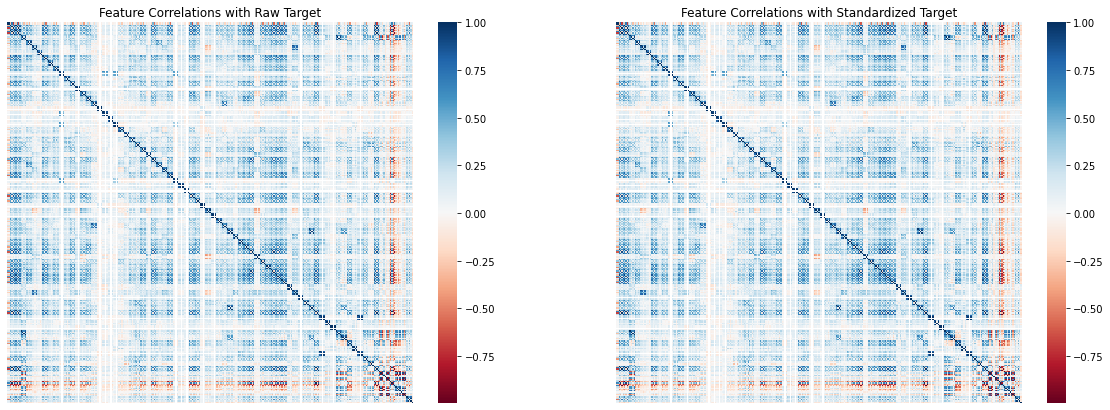

In [5]:
juries_model.viz_target()

In [6]:
juries_model.define_model(model_type = 'lasso')

In [7]:
juries_model.model_metrics(juries_model.baseline_model)

Model Metrics
R2: -0.0561	MAE: 0.8517	MSE: 0.9404	RMSE: 0.9697


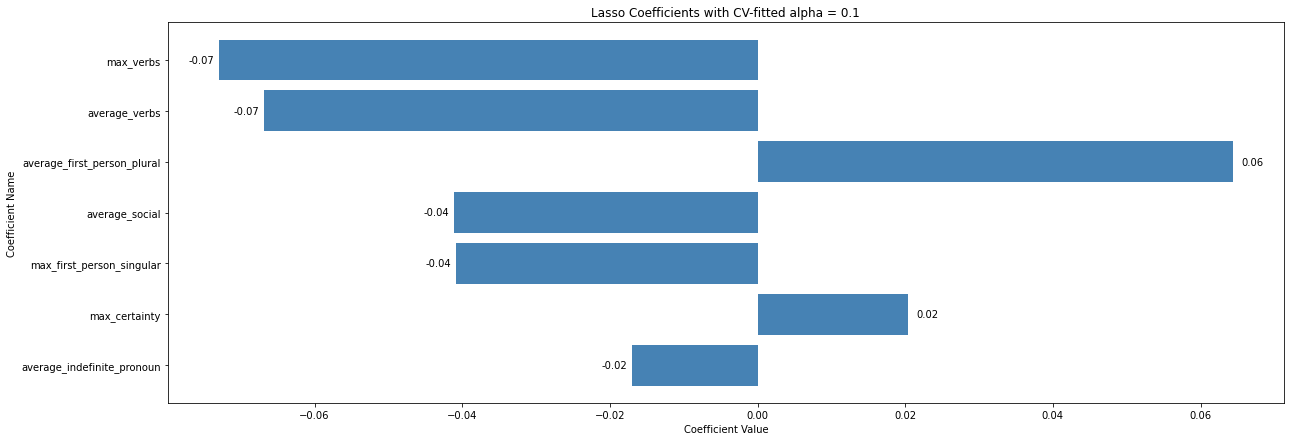

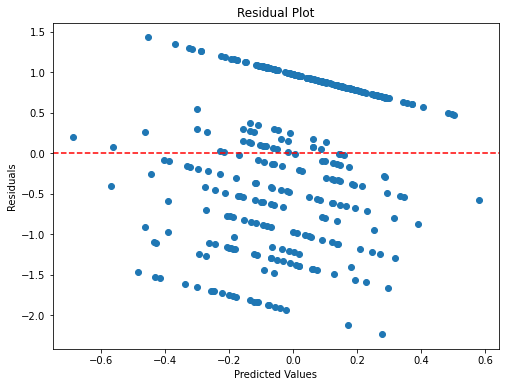

In [8]:
juries_model.model_diagnostics(juries_model.baseline_model)

In [9]:
#juries_model.optimize_model()

In [10]:
#juries_model.model_metrics(juries_model.optimized_model)

In [11]:
#juries_model.model_diagnostics(juries_model.optimized_model)

# CSOP I Model

In [5]:
csopI_model = ModelBuilder(dataset_names = ["csop"])

In [13]:
csopI_model.select_target(target=csopI_model.conv_complete["zscore_efficiency"])

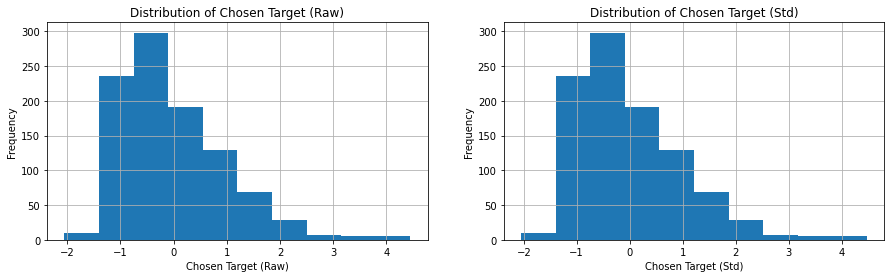

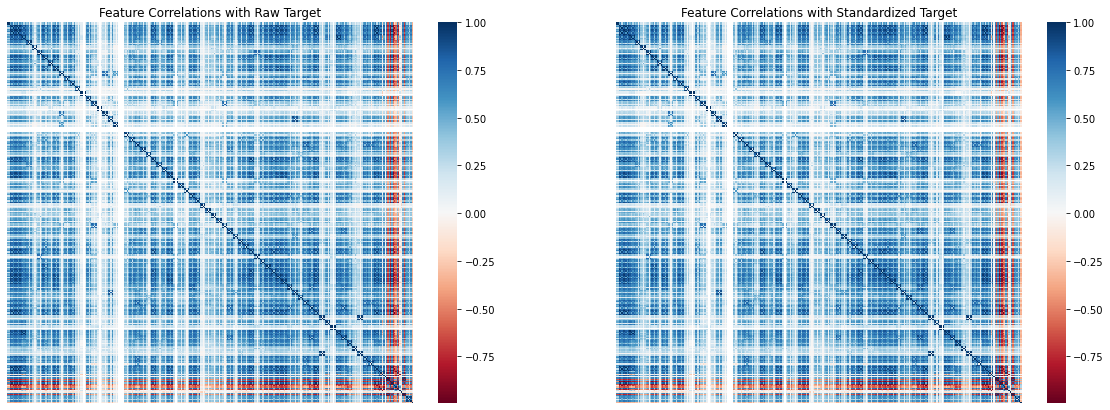

In [14]:
csopI_model.viz_target()

In [15]:
csopI_model.define_model(model_type = 'lasso')

In [16]:
csopI_model.model_metrics(csopI_model.baseline_model)

Model Metrics
R2: -0.1627	MAE: 0.6876	MSE: 0.8208	RMSE: 0.906


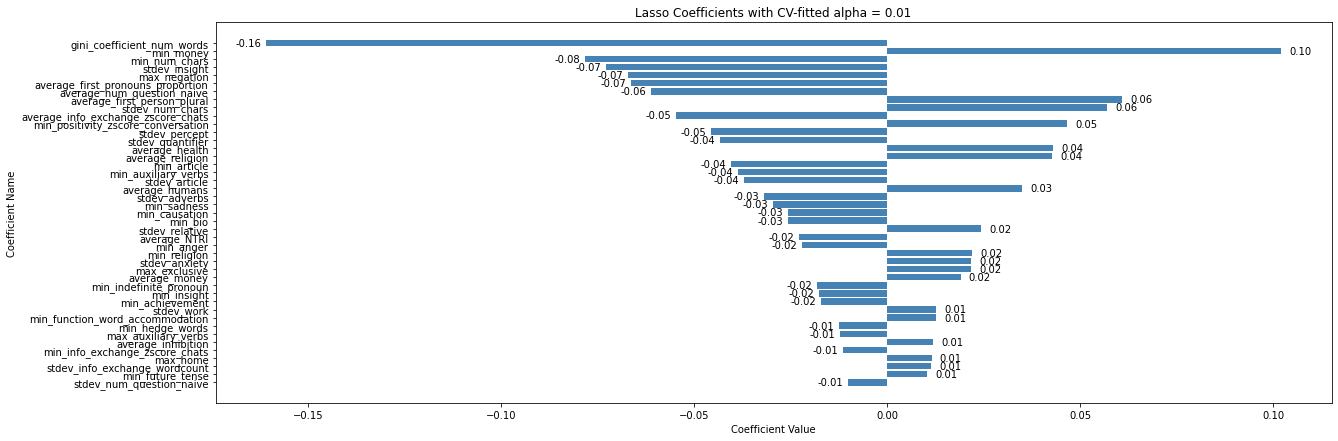

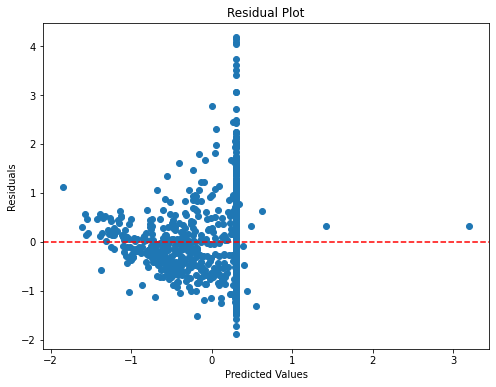

In [17]:
csopI_model.model_diagnostics(csopI_model.baseline_model)

In [18]:
#csopI_model.optimize_model()

In [19]:
#csopI_model.model_metrics(csopI_model.optimized_model)

# CSOP II

In [6]:
csopII_model = ModelBuilder(dataset_names = ["csopII"])

In [21]:
csopII_model.select_target(target=csopII_model.conv_complete["efficiency"])

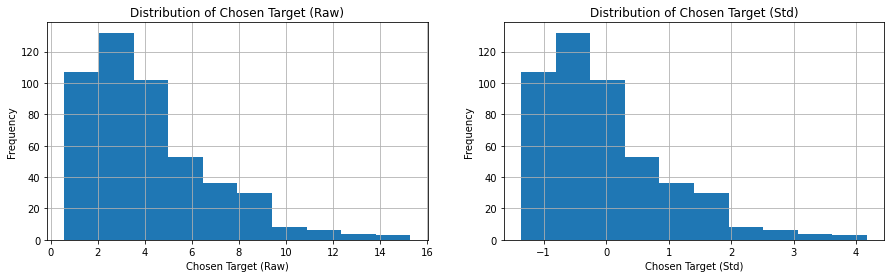

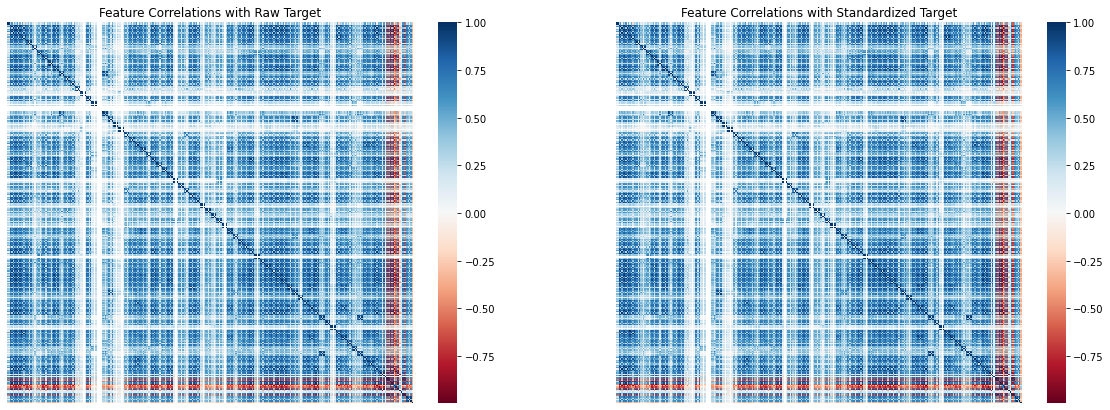

In [22]:
csopII_model.viz_target()

In [23]:
csopII_model.define_model(model_type = 'lasso')

In [24]:
csopII_model.model_metrics(csopII_model.baseline_model)

Model Metrics
R2: -0.1577	MAE: 0.6912	MSE: 0.8398	RMSE: 0.9164


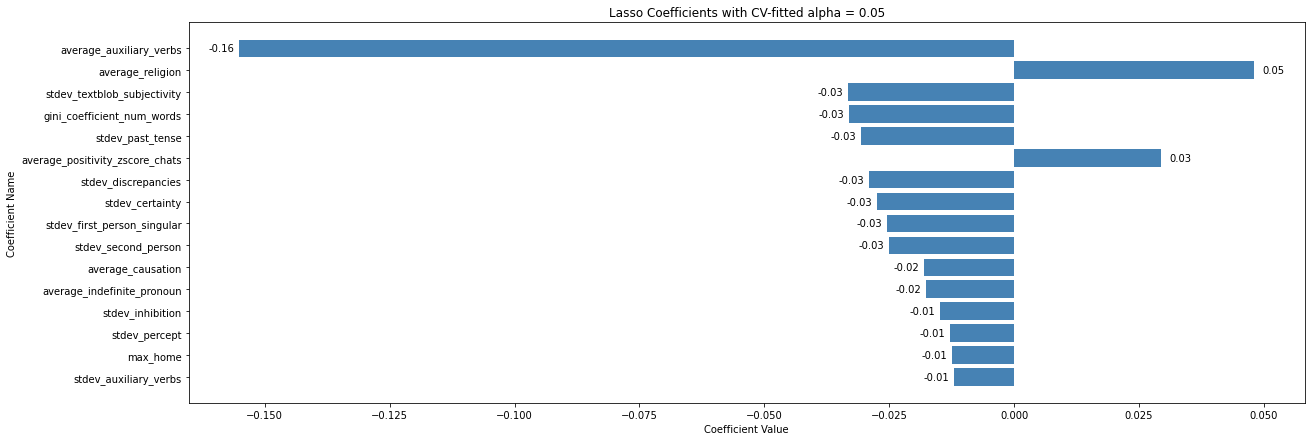

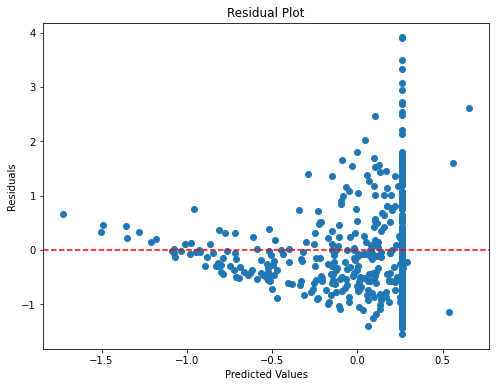

In [25]:
csopII_model.model_diagnostics(csopII_model.baseline_model)

In [26]:
#csopII_model.optimize_model()

In [27]:
#csopII_model.model_metrics(csopII_model.optimized_model)

# Estimation (Becker)

In [7]:
becker_model = ModelBuilder(dataset_names = ["becker"])

In [29]:
becker_model.select_target(target=becker_model.conv_complete["mean_post_discussion_error_pct"])

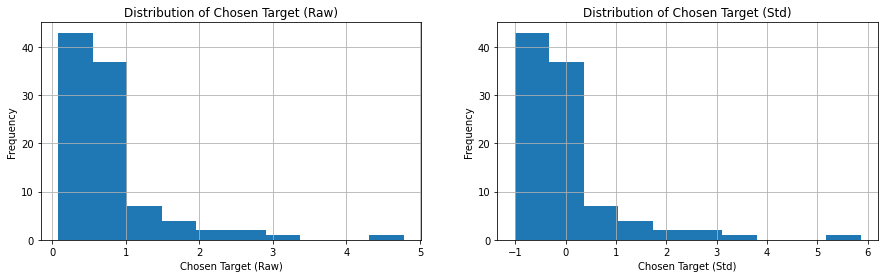

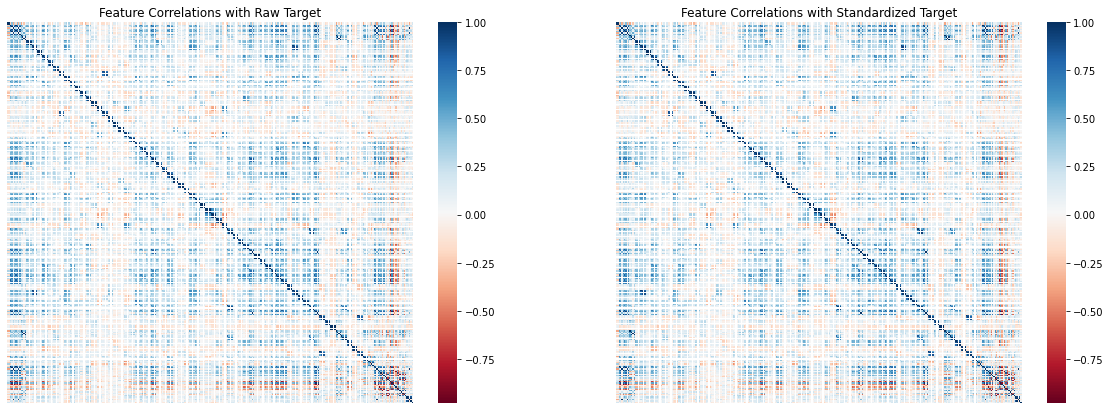

In [30]:
becker_model.viz_target()

In [31]:
becker_model.define_model(model_type = 'lasso')

In [32]:
# TODO - need a way to identify outliers; model is super sensitive to them (I manually deleted 3)
#becker_model.model_metrics(becker_model.baseline_model)

In [33]:
# TODO - Becker model also doesn't do a good job with LASSO -- turns out all coefs are 0?
#becker_model.model_diagnostics(becker_model.baseline_model)

# DAT

In [8]:
dat_model = ModelBuilder(dataset_names = ["dat"])

In [35]:
dat_model.select_target(target=dat_model.conv_complete["score"])

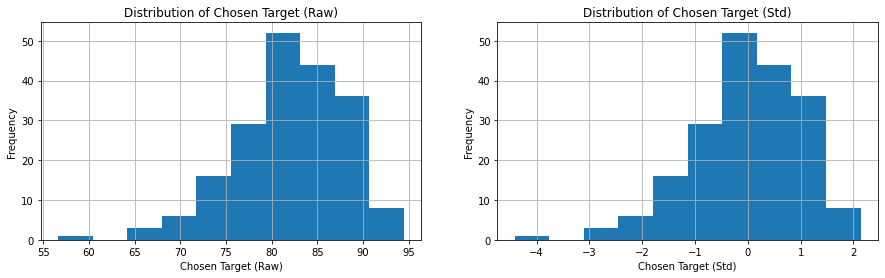

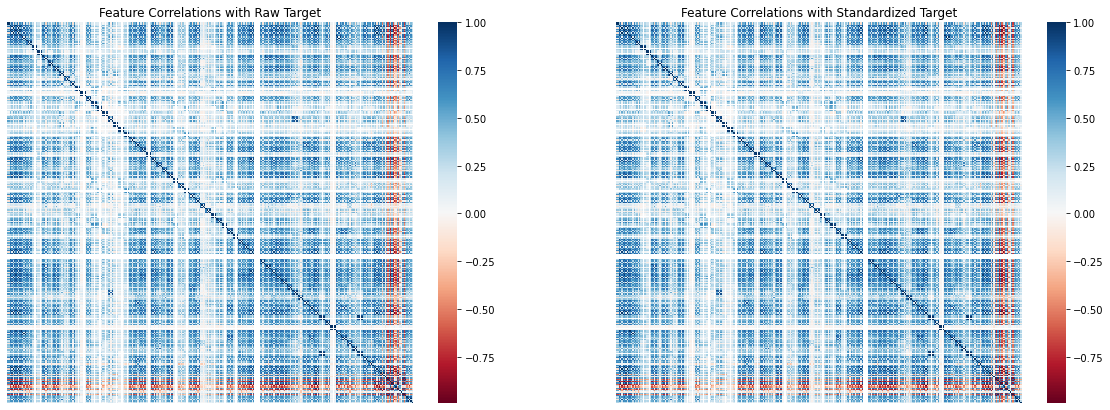

In [36]:
dat_model.viz_target()

In [37]:
dat_model.define_model(model_type = 'lasso')

In [38]:
dat_model.model_metrics(dat_model.baseline_model)

Model Metrics
R2: -0.0803	MAE: 0.7322	MSE: 0.9012	RMSE: 0.9493


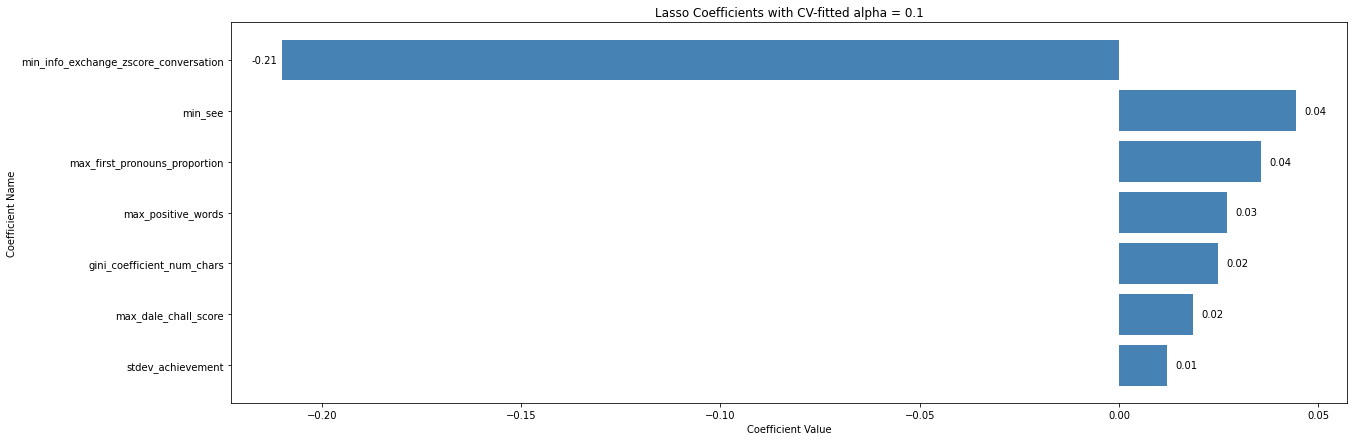

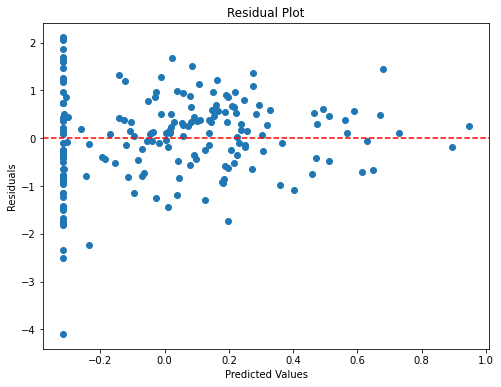

In [39]:
dat_model.model_diagnostics(becker_model.baseline_model)